## Observations and Insights

## Dependencies and starter code

#### Conclusion:
    1.We have an equal representation of mice by sex, almost the same number of Female(49.4%) and Male(50.6%)
    2.Among 4 best Drug Regiments only for Infubinol we detected one outlier bellow lower bound
    3.The Line plot shows that a mouse treated with Capomulin will get better results. 
      We can see that the Tumor Volume decreases.
    4.The correlation between mouse weight and tumor volumn for the Capomulin regimen is: 0.84, which is very close by 1. 
      A correlation of 1.0 shows a perfect positive correlation. In our exemple we have a strong relationship  
      between these two variables represented by the liniar equation y = 0.95x + 21.55.
        As a mouse weight increases tumor volume increases as well. 
        

In [38]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy import stats

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
# Merge the two datasets on "Mouse ID" 
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
result_df = combined_data_df.groupby(['Drug Regimen'], as_index=False).agg(
                      {'Tumor Volume (mm3)':['mean','median','var','std','sem']})

result_df.columns = ['Drug Regimen',
                  'Tumor Volume Mean',
                  'Tumor Volume Median',
                  'Tumor Volume Variance',
                  'Tumor Volume std',
                  'Tumor Volume SEM']

result_df.reindex(columns=sorted(result_df.columns))

,Drug Regimen,Tumor Volume Mean,Tumor Volume Median,Tumor Volume SEM,Tumor Volume Variance,Tumor Volume std
0,Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
1,Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
2,Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
3,Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
4,Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
5,Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
6,Propriva,52.322552,50.854632,0.512884,42.351070,6.507770
7,Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
8,Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419
9,Zoniferol,53.236507,51.818479,0.516398,48.533355,6.966589


## Bar plots

In [40]:
plt.close()

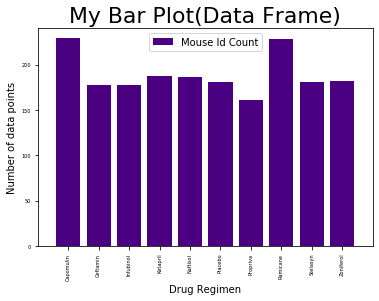

In [41]:
# Generate a bar plot showing number of data points for each treatment regimen using DataFrame
axe_df = combined_data_df.groupby('Drug Regimen').count()[['Mouse ID']]
axe_df = axe_df.rename(columns = {'Mouse ID': 'Mouse Id Count'})
x_axis = np.arange(len(axe_df))
ax = axe_df.plot(kind='bar',figsize=(6,4), color="indigo",alpha=1, fontsize=5, width=0.80)

# x and y limits
plt.xlim(-1 , len(x_axis))
plt.ylim(0, max(axe_df['Mouse Id Count'])+10)

ax.set_title('My Bar Plot(Data Frame)', fontsize=22)
ax.set_ylabel('Number of data points', fontsize=10)
ax.set_xlabel('Drug Regimen', fontsize=10);
plt.savefig("../MyBarPlot(DataFrame).png")

In [42]:
plt.close()

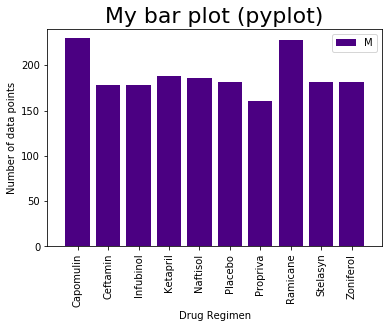

<Figure size 432x288 with 0 Axes>

In [43]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
group = combined_data_df.groupby('Drug Regimen')['Mouse ID'].count()
x = ['Capomulin','Ceftamin', 'Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol' ]
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, group, color='indigo', align="center", alpha=1, )
plt.xticks(x_pos, x, rotation=90)

#plt.figure(figsize=(10,4))          -------------> ????the plot is not adjusting to this size???So, to make both plots to look identical, I will adjust non of them to this size.
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("Number of data points", fontsize=10)
plt.title("My bar plot (pyplot)", fontsize=22)
plt.xticks(x_pos, x, rotation=90)
plt.legend("Mouse Id Count", loc=1);

#Set the x and y limits
plt.xlim(-1, len(x_pos)+0)
plt.ylim(0, max(group)+10)

plt.show()
plt.savefig("../MyBarPlot(Pyplot).png")

In [44]:
plt.close()

## Pie plots

In [45]:
#Gender Count
gender_count_df = combined_data_df.groupby("Sex")["Mouse ID"].count()
gender_count_df.head()

#Gender demographics DataFrame.
gender_demographics_df = pd.DataFrame({"count": gender_count_df})
gender_demographics_df = gender_demographics_df.round(2)
gender_demographics_df

,count
Sex,
Female,935
Male,958


In [46]:
plt.close()

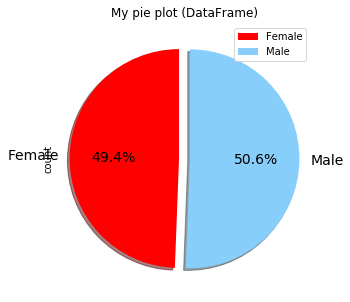

<Figure size 432x288 with 0 Axes>

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df = pd.DataFrame(gender_demographics_df)
plt.figure(figsize=(10,5))

ax1 = plt.subplot(121, aspect='equal')
explode = (0, 0.1,)
df.plot.pie( y ='count', ax=ax1, autopct='%1.1f%%', colors = ["red","lightskyblue"],
 startangle=90,labels=df.index, legend = False, fontsize=14, shadow=True, explode=explode)
plt.title('My pie plot (DataFrame)')
plt.axis('equal')
ax1.legend(["Female", "Male"]);
plt.show()
plt.savefig("../MyPiePlot(DataFrame).png")

In [48]:
plt.close()

/Users/bolboceanunicolai/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


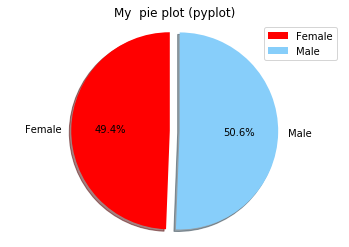

<Figure size 432x288 with 0 Axes>

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0, 0.1,)
labels = 'Female','Male'
plt.pie(gender_demographics_df, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ["red","lightskyblue"])
plt.title("My  pie plot (pyplot)")
plt.axis('equal')
plt.legend(labels);

plt.show()
plt.savefig("../MyPiePlot(Pyplot).png")

In [50]:
plt.close()

## Quartiles, outliers and boxplots

#### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [51]:
#Select the columns we will need to work from original data frame 
tumor_data_df = combined_data_df[['Mouse ID','Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']]
tumor_data_df.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,k403,0,Ramicane,45.000000
1,k403,5,Ramicane,38.825898
2,k403,10,Ramicane,35.014271
3,k403,15,Ramicane,34.223992
4,k403,20,Ramicane,32.997729


In [52]:
#Create a list with the drugs will need to work
list_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Select only these 4 Drug Regimens and reset the index
only_4_df = tumor_data_df.loc[combined_data_df['Drug Regimen'].isin(list_drugs)]
only_4_df.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,k403,0,Ramicane,45.000000
1,k403,5,Ramicane,38.825898
2,k403,10,Ramicane,35.014271
3,k403,15,Ramicane,34.223992
4,k403,20,Ramicane,32.997729


In [53]:
#To calculate the final tumor volume we have to select the mouse Id with the highest Timepoint.
max_Timepoint_df = only_4_df.groupby('Mouse ID')[['Timepoint']].max()  
#Reset Index (So we can merge this dataset to get correct tumor value)
max_Timepoint_df = max_Timepoint_df.reset_index()
max_Timepoint_df.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [54]:
#Will combine  these 2 dataframes
only_4_df = pd.merge(only_4_df,max_Timepoint_df, on = ['Mouse ID','Timepoint'])
only_4_df.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,k403,45,Ramicane,22.050126
1,s185,45,Capomulin,23.343598
2,x401,45,Capomulin,28.484033
3,m601,45,Capomulin,28.430964
4,g791,45,Ramicane,29.128472


In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
                                                #Credit to Ash Patel for helping to understand how to apply this double loop to my code
quartiles = data_iqr.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

IQR_4 = []
Outlier_List = [] #a list to store infos about outliers 
def IQR_Calculations(data_iqr):
    quartiles = data_iqr.quantile([0.25, 0.75])
    upperq = quartiles[0.75]
    lowerq = quartiles[0.25]
    iqr = upperq - lowerq
    upper_bound = upperq+1.5*iqr
    lower_bound = lowerq-1.5*iqr
    upper_check = upper_bound - data_iqr
    lower_check = data_iqr-lower_bound

# Set a flag until flag not true
    flag = True
    while flag:
        for j in range(len(upper_check)):
            if upper_check[j] > 0 and lower_check[j]>0:
                pass
            else:
                return [round(iqr,2), 'Yes']
                flag = False
                break
        break
    if flag:
        return [round(iqr,2), 'No']
    
all_regimens = only_4_df['Drug Regimen'].unique()

outlier_list = []

for i in range(len(all_regimens)):
    data_iqr = combined_data_df.loc[combined_data_df['Drug Regimen'] == all_regimens[i]].groupby('Mouse ID').last()['Tumor Volume (mm3)']
    IQR_4.append(IQR_Calculations(data_iqr)[0])
    Outlier_List.append(IQR_Calculations(data_iqr)[1])

    print(f"The lower quartile of tumor treadet with {all_regimens[2]} is: {lowerq}")
print(f"The upper quartile of tumor treadet with {all_regimens[2]} is: {upperq}")
print(f"The interquartile range of tumor treadet with {all_regimens[2]} is IQR: {iqr}")
print(f"The the median of tumor treadet with {all_regimens[2]} is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers for {all_regimens[2]}.")
print(f"Values above {upper_bound} could be outliers for {all_regimens[2]}.")

IQR = pd.DataFrame(index=all_regimens, data={'IQR':IQR_4,
                                                     'Passed Outlier Test':Outlier_List})
IQR



The lower quartile of tumor treadet with Infubinol is: 48.72207785
The lower quartile of tumor treadet with Infubinol is: 48.72207785
The lower quartile of tumor treadet with Infubinol is: 48.72207785
The lower quartile of tumor treadet with Infubinol is: 48.72207785
The upper quartile of tumor treadet with Infubinol is: 64.29983003
The interquartile range of tumor treadet with Infubinol is IQR: 15.577752179999997
The the median of tumor treadet with Infubinol is: 59.85195552 
Values below 25.355449580000002 could be outliers for Infubinol.
Values above 87.66645829999999 could be outliers for Infubinol.


,IQR,Passed Outlier Test
Ramicane,9.10,No
Capomulin,7.78,No
Infubinol,11.48,Yes
Ceftamin,15.58,No


In [59]:
plt.close()

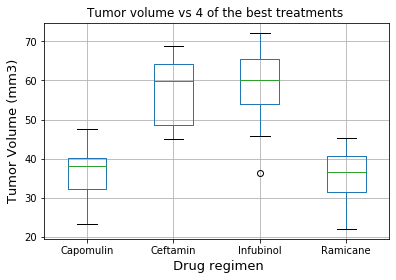

In [12]:

#Generate a box plot containing information obout 4 best Regiments and showing any possible outliers
ax = only_4_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', fontsize=10)
plt.suptitle("")
flierprops = dict(column='Tumor Volume (mm3)', by='Drug Regimen', rot=45, fontsize=10, layout=None)

ax.set_xlabel(" Drug regimen", fontsize=13)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=13)
#ax.set_title("Boxplot of V1")
ax.set_title('Tumor volume vs 4 of the best treatments ')
#ax.set_xticklabels(Top_4_Regimen_df.keys())
ax.set_title('Tumor volume vs 4 of the best treatments ')
plt.savefig("../TumorVolumeVS4OfTheBestTreatments.png")


In [13]:
plt.close()

## Line and scatter plots

#### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [16]:
# Will have to exctract info about Capomulin from original dataframe
combined_data_cap_df = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']
combined_data_cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [33]:
# Will analyse the Data for the mouse with ID: s185
combined_data_cap_df = combined_data_cap_df.loc[combined_data_cap_df['Mouse ID'] == 's185']
tumor_mean_df = combined_data_cap_df .groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"]
#Reset Index
tumor_mean_df = tumor_mean_df.reset_index()
tumor_mean_df.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,43.878496
2,Capomulin,10,37.614948
3,Capomulin,15,38.177232
4,Capomulin,20,36.866876


In [34]:
plt.close()

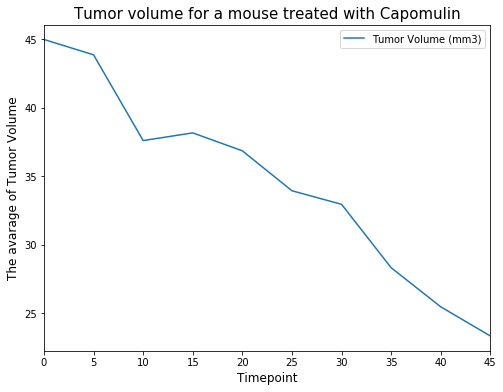

<Figure size 432x288 with 0 Axes>

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.figure(figsize=(8,6))
ax = plt.gca()

tumor_mean_df.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',ax=ax)
plt.title('Tumor volume for a mouse treated with Capomulin', fontsize=15)
plt.xlabel("Timepoint",fontsize=12)
plt.ylabel("The avarage of Tumor Volume", fontsize=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()
plt.savefig("../LinePlot.png")

In [36]:
plt.close()

#### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [22]:
# Will have to extract the infor about Capomulin from original dataframe 
comb_data_df = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']
comb_data_df = comb_data_df.groupby('Mouse ID')
comb_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
435,i557,Capomulin,Female,1,24,20,43.967895,0
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [61]:
# Calculate the avaage of weights  and tumor volume
weights_mean_df = comb_data_df['Weight (g)'].mean()
tumor_mean_df = comb_data_df['Tumor Volume (mm3)'].mean()
 

In [25]:
plt.close()

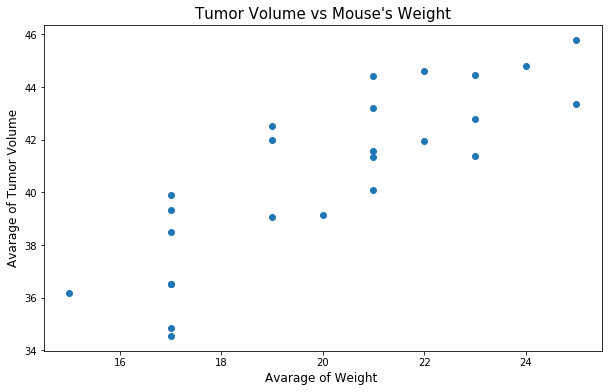

In [26]:
#Generate the scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(weights_mean_df, tumor_mean_df )
ax.set_xlabel('Avarage of Weight ',fontsize=12)
ax.set_ylabel('Avarage of Tumor Volume',fontsize=12)
ax.set_title("Tumor Volume vs Mouse's Weight",fontsize=15);
plt.show()

In [29]:
plt.close()

#### Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the avaage of weights  and tumor volume
weights_mean_df = comb_data_df['Weight (g)'].mean()
tumor_mean_df = comb_data_df['Tumor Volume (mm3)'].mean()
 

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64
y = 0.95x + 21.55
The correlation between mouse weight and tumor volumn for the Capomulin regimen is: 0.8419363424694718


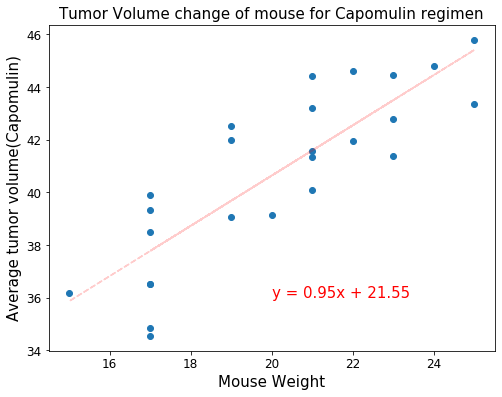

<Figure size 432x288 with 0 Axes>

In [62]:
#Create a regression model
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weights_mean_df, tumor_mean_df)
regress_values = weights_mean_df * slope + intercept
print(regress_values)

# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot the linear model with scatter plot
plt.figure(figsize=(8,6))
plt.scatter(weights_mean_df, tumor_mean_df)
plt.plot(weights_mean_df, regress_values, 'r--', alpha=0.2)

# Label plot and annotate the line equation
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight', size=15)
plt.ylabel('Average tumor volume(Capomulin)', size=15)
plt.title('Tumor Volume change of mouse for Capomulin regimen', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
print(f"The correlation between mouse weight and tumor volumn for the Capomulin regimen is: {rvalue}")

plt.show()
plt.savefig("../RegressionScatterPlot.png")

In [28]:
plt.close

<function matplotlib.pyplot.close(fig=None)>

In [ ]:
#### rvalue = 0.84, which is very close by 1. A correlation of 1.0 shows a perfect positive correlation. 
#In our exemple we have a strong correlation (0.84) between these variables: Mouse weight and Tumor volume 